<a href="https://colab.research.google.com/github/valixonov04/small_projects/blob/main/Teri_kasaligi_uchu_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
haroonalam16_20_skin_diseases_dataset_path = kagglehub.dataset_download('haroonalam16/20-skin-diseases-dataset')
print('Data source import complete.')

100%|██████████| 321M/321M [00:02<00:00, 152MB/s]

Extracting files...


Data source import complete.


**#Kerakli kutib honalar va data**

In [ ]:
! pip install opencv-python

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#os
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

**Kerakli kutib algaritimlar**

In [ ]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("haroonalam16/20-skin-diseases-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/20-skin-diseases-dataset


In [ ]:
import zipfile
with zipfile.ZipFile('/content/Dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

*Ma'lumotlarni qayat ishlash va traning uchuntayorlash*

In [ ]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    '/content/dataset/Dataset/train',  # Path to training data directory
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/dataset/Dataset/test',  # Path to testing data directory
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')
print(test_generator.class_mode)

Found 2609 images belonging to 19 classes.
Found 897 images belonging to 20 classes.
categorical


#Number of classes check above

In [ ]:
path = '/content/dataset/Dataset/train' #Don't forget that last bar

In [ ]:
class_names = sorted(os.listdir(path))
num_classes = len(class_names)
img_size = (192, 192, 3)
print('classes: ', class_names)

classes:  ["Aktinik keratoz, bazal hujayrali saraton va boshqa yomon sifatli o'smalar", 'Atopik dermatit suratlari', 'Eksantemalar va dori ta’siridan paydo bo‘lgan toshmalar', 'Ekzema suratlari', 'Gerpes, HPV va boshqa jinsiy yo‘l bilan yuqadigan infeksiyalar suratlari', 'Melanoma, teri saratoni, nevuslar va holatlar', 'Psoriaz, liken planus va shu kabi boshqa kasalliklar', 'Qizil yuguruk (lupus) va boshqa biriktiruvchi to‘qima kasalliklari', 'Qon tomir o‘smalari', 'Seboreik keratoz va boshqa xo‘jalik (beg‘ubor) o‘smalar', 'Sellulit, impetigo va boshqa bakterial infeksiyalar', 'Tinea (qurt), ringworm, kandidoz va boshqa zamburug‘li infeksiyalar', 'Tizimli kasalliklar', 'Tovoq (siyrak) siğillari, molluskum va boshqa virusli infeksiyalar', 'Ugri va rozatseya suratlari', 'Urtikariya (qichima) va toshmalar', 'Vaskulit suratlari', 'Yorug‘lik kasalliklari va pigmentatsiya buzilishlari', 'Zaharli sumalak va boshqa kontakt dermatitlar suratlari']


#Epochs

OpenSV

In [ ]:
import os
# Fayl nomlarini to'g'ri formatlash
path = '/content/dataset/Dataset/train/'  # Fayl joylashgan papka
# class_names ro'yxatidagi har bir nomni tekshirib chiqish
for cl in class_names:
    # Bo'sh joylarni almashtirish va maxsus belgilarni tozalash
    formatted_class_name = cl.replace(' ', '_')  # bo'sh joylarni almashtirish
    formatted_class_name = formatted_class_name.replace(',', '')  # vergulni olib tashlash
    formatted_class_name = formatted_class_name.replace("'", "")  # ' belgilarni olib tashlash
    class_path = os.path.join(path, formatted_class_name)
    # Fayl yo'lini tekshirish
    if os.path.exists(class_path):
        print(f'{class_path} -> mavjud')
        # Fayllarni o'qish
        for img in os.listdir(class_path):
            # Kodni davom ettiring
            print(img)
    else:
        print(f'{class_path} -> topilmadi')

/content/dataset/Dataset/train/Aktinik_keratoz_bazal_hujayrali_saraton_va_boshqa_yomon_sifatli_osmalar -> topilmadi
/content/dataset/Dataset/train/Atopik_dermatit_suratlari -> topilmadi
/content/dataset/Dataset/train/Eksantemalar_va_dori_ta’siridan_paydo_bo‘lgan_toshmalar -> topilmadi
/content/dataset/Dataset/train/Ekzema_suratlari -> topilmadi
/content/dataset/Dataset/train/Gerpes_HPV_va_boshqa_jinsiy_yo‘l_bilan_yuqadigan_infeksiyalar_suratlari -> topilmadi
/content/dataset/Dataset/train/Melanoma_teri_saratoni_nevuslar_va_holatlar -> topilmadi
/content/dataset/Dataset/train/Psoriaz_liken_planus_va_shu_kabi_boshqa_kasalliklar -> topilmadi
/content/dataset/Dataset/train/Qizil_yuguruk_(lupus)_va_boshqa_biriktiruvchi_to‘qima_kasalliklari -> topilmadi
/content/dataset/Dataset/train/Qon_tomir_o‘smalari -> topilmadi
/content/dataset/Dataset/train/Seboreik_keratoz_va_boshqa_xo‘jalik_(beg‘ubor)_o‘smalar -> topilmadi
/content/dataset/Dataset/train/Sellulit_impetigo_va_boshqa_bakterial_infeksiya

In [ ]:
#CRN4TWW https://www.kaggle.com/code/crn4tww/dog-emotions-classifier
import cv2
labels = []
images = []
print('images:\n')
for cl in class_names:
    print(cl, end=' -> ')
    for img in os.listdir(path + cl):
        label = np.zeros(num_classes)
        label[class_names.index(cl)] = 1
        labels.append(label)
        image = np.asarray(cv2.resize(cv2.imread(path + cl + '/' + img, cv2.IMREAD_COLOR), img_size[0:2])[:, :, ::-1])#That line remove Blue
        #image = np.asarray(cv2.resize(cv2.imread(data_path + cl + '/' + img, cv2.COLOR_BGR2RGB), img_size[0:2]))
        images.append(image)
    print('done')
labels = np.asarray(labels)
images = np.asarray(images)
print(f'\n\nlabels shape: {labels.shape}')
print(f'images shape: {images.shape}')

images:

Aktinik keratoz, bazal hujayrali saraton va boshqa yomon sifatli o'smalar -> done
Atopik dermatit suratlari -> done
Eksantemalar va dori ta’siridan paydo bo‘lgan toshmalar -> done
Ekzema suratlari -> done
Gerpes, HPV va boshqa jinsiy yo‘l bilan yuqadigan infeksiyalar suratlari -> done
Melanoma, teri saratoni, nevuslar va holatlar -> done
Psoriaz, liken planus va shu kabi boshqa kasalliklar -> done
Qizil yuguruk (lupus) va boshqa biriktiruvchi to‘qima kasalliklari -> done
Qon tomir o‘smalari -> done
Seboreik keratoz va boshqa xo‘jalik (beg‘ubor) o‘smalar -> done
Sellulit, impetigo va boshqa bakterial infeksiyalar -> done
Tinea (qurt), ringworm, kandidoz va boshqa zamburug‘li infeksiyalar -> done
Tizimli kasalliklar -> done
Tovoq (siyrak) siğillari, molluskum va boshqa virusli infeksiyalar -> done
Ugri va rozatseya suratlari -> done
Urtikariya (qichima) va toshmalar -> done
Vaskulit suratlari -> done
Yorug‘lik kasalliklari va pigmentatsiya buzilishlari -> done
Zaharli sumalak va

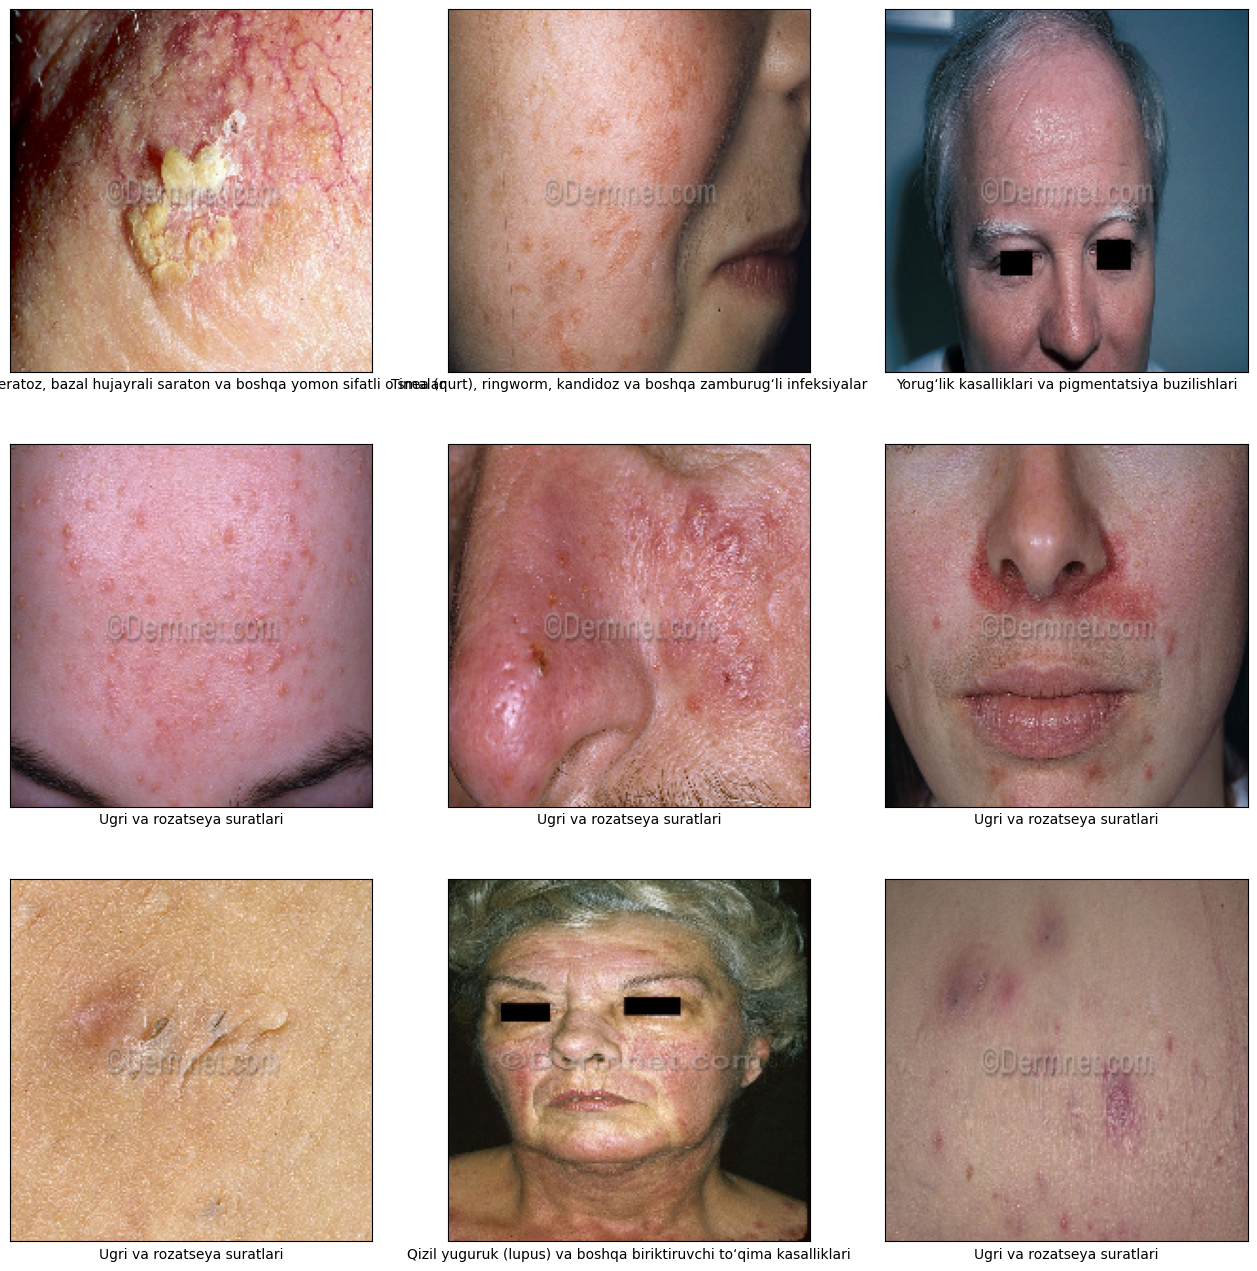

In [ ]:
from random import randint
fig, axs = plt.subplots(3, 3, figsize=(16, 16))#Original was 10,6
for x in range(3):
    for y in range(3):
        i = randint(0, len(images))
        axs[x][y].imshow(images[i])
        axs[x][y].set_xticks([])
        axs[x][y].set_yticks([])
        axs[x][y].set_xlabel(class_names[np.argmax(labels[i])])
plt.show()

In [ ]:
#CRN4TWW https://www.kaggle.com/code/crn4tww/dog-emotions-classifier
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.15, random_state=42)
print(f'train images shape: {X_train.shape}\ntrain labels shape: {y_train.shape}\n\nvalidation images shape: {X_val.shape}\nvalidation labels shape: {y_val.shape}\n')

train images shape: (2217, 192, 192, 3)
train labels shape: (2217, 19)

validation images shape: (392, 192, 192, 3)
validation labels shape: (392, 19)



#CNN Model

In [ ]:
#CRN4TWW https://www.kaggle.com/code/crn4tww/dog-emotions-classifier
import tensorflow as tf
cnn_model = tf.keras.Sequential()
# Inputs and rescaling
cnn_model.add(tf.keras.layers.Rescaling(scale=1. / 255, input_shape=(img_size)))

# Convolutional block 1
cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
# Convolutional block 2
cnn_model.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
# Convolutional block 3
cnn_model.add(tf.keras.layers.Conv2D(256, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(256, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
# Convolutional block 4
cnn_model.add(tf.keras.layers.Conv2D(512, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(512, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
cnn_model.add(tf.keras.layers.Flatten())
# Dense block
cnn_model.add(tf.keras.layers.Dense(256, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(128, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
cnn_model.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 192, 192, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 192, 192, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 192, 192, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 96, 96, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 96, 96, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 96, 96, 128)    │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 48, 48, 256)    │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 48, 48, 256)    │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 512)    │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 512)    │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    18,874,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 19)             │         1,235 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,021,907 (80.19 MB)

 Trainable params: 21,021,907 (80.19 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#CRN4TWW https://www.kaggle.com/code/crn4tww/dog-emotions-classifier
from tensorflow.keras.callbacks import ModelCheckpoint
# creating ModelChecpoint callback
checkpoint_callback = ModelCheckpoint('cnn_model/model_{epoch:02d}.keras')


#Epochs 20

In [ ]:
history = cnn_model.fit(images, labels, epochs=20, validation_data=(X_val, y_val), callbacks=[checkpoint_callback])
# Modelni .h5 faylga saqlash
cnn_model.save('cnn_model1.h5')
# Faylni yuklab olish
from google.colab import files
files.download('cnn_model1.h5')

Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 26s 314ms/step - accuracy: 0.9776 - loss: 0.0920 - val_accuracy: 0.9719 - val_loss: 0.0970
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 36s 251ms/step - accuracy: 0.9730 - loss: 0.1021 - val_accuracy: 0.9745 - val_loss: 0.0885
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 46s 315ms/step - accuracy: 0.9800 - loss: 0.0905 - val_accuracy: 0.9796 - val_loss: 0.0829
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 38s 273ms/step - accuracy: 0.9816 - loss: 0.0718 - val_accuracy: 0.9745 - val_loss: 0.1069
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 40s 261ms/step - accuracy: 0.9778 - loss: 0.0837 - val_accuracy: 0.9770 - val_loss: 0.0832
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 45s 315ms/step - accuracy: 0.9834 - loss: 0.0763 - val_accuracy: 0.9745 - val_loss: 0.0824
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 22s 263ms/step - accuracy: 0.9769 - loss: 0.0848 - val_accuracy: 0.9821 - val_loss: 0.0747
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 44s 300ms/step - accuracy: 0.9812 - loss: 0.0669 - val_accu

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

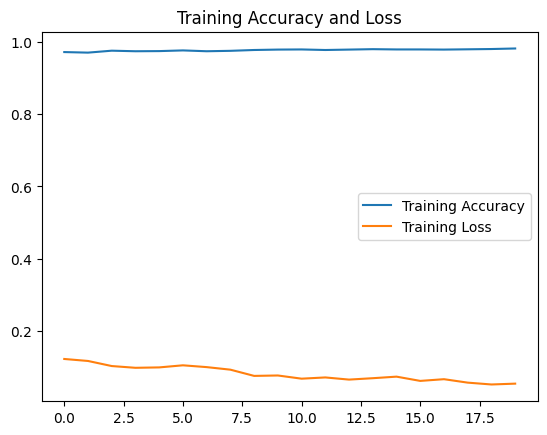

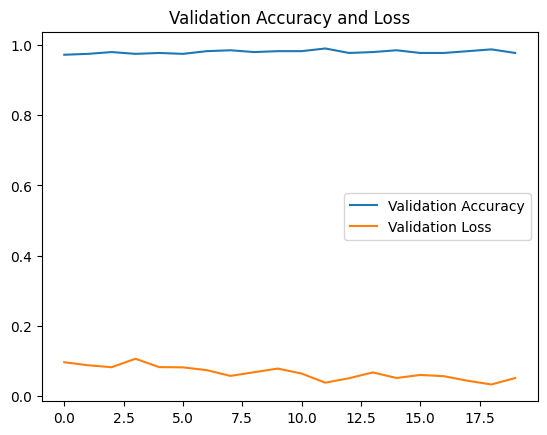

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.figure()
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, loss, label='Training Loss')
plt.legend()
plt.title('Training Accuracy and Loss')

plt.figure()
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.title('Validation Accuracy and Loss')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 793ms/step


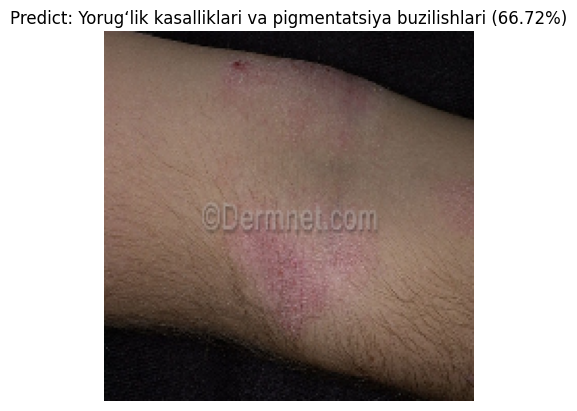

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Modelni yuklab olish
model = tf.keras.models.load_model('/content/cnn_model1.h5')

# Sinflar ro‘yxatini qayta o‘rnatamiz
#class_names = sorted(os.listdir('/content/dataset/Dataset/train'))|

# Test uchun rasm yuklash
img_path = '/content/dataset/Dataset/test/Atopic Dermatitis Photos/05Atopic031011.jpg'  # ← Bu yerga test rasm yo‘lini yoz

# Rasmni tayyorlash
img = cv2.imread(img_path)
img = cv2.resize(img, (192, 192))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_array = np.expand_dims(img, axis=0) / 255.0  # Model uchun normalize qilish
# Bashorat qilish
prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]
# Natijani chiqarish
plt.imshow(img)
plt.title(f"Predict: {predicted_class} ({np.max(prediction)*100:.2f}%)")
plt.axis('off')
plt.show()


Above, that was the only size that I could read the legends.
More images, the letters were so tiny.

#Acknowledgements:

mpwolke https://www.kaggle.com/code/mpwolke/avoid-opencv2-blue-images

mpwolke https://www.kaggle.com/code/mpwolke/monkeys-cnn-classifier#CNN-(Convolutional-Neural-Network)

mpwolke https://www.kaggle.com/code/mpwolke/coral-snake-cnn

CRN4TWW https://www.kaggle.com/code/crn4tww/dog-emotions-classifier

CRN4TWW https://www.kaggle.com/code/crn4tww/cnn-cheetahs-and-lions-classifier